In [1]:
import PIL.Image as Image
import numpy.matlib
import numpy as np
import random
import math
#import cv2


# %% functions
dithMat = [
    # 8x8 sprial
    [[62, 58, 45, 41, 37, 49, 53, 61],
     [54, 34, 25, 21, 17, 29, 33, 57],
     [50, 30, 13, 9, 5, 12, 24, 44],
     [38, 18, 6, 1, 0, 8, 20, 40],
     [42, 22, 10, 2, 3, 4, 16, 36],
     [46, 26, 14, 7, 11, 15, 28, 48],
     [59, 35, 31, 19, 23, 27, 32, 52],
     [63, 55, 51, 39, 43, 47, 56, 60]],
    # 8x8 dispresed
    [[1, 30, 8, 28, 2, 29, 7, 27],
     [17, 9, 24, 16, 18, 10, 23, 15],
     [5, 25, 3, 32, 6, 26, 4, 31],
     [21, 13, 19, 11, 22, 14, 20, 12],
     [2, 29, 7, 27, 1, 30, 8, 28],
     [18, 10, 23, 15, 17, 9, 24, 16],
     [6, 26, 4, 31, 5, 25, 3, 32],
     [22, 14, 20, 12, 21, 13, 19, 11]],
    # 8X8 octa_dot
    [[45, 17, 25, 37, 47, 19, 27, 39],
     [49, 1, 9, 57, 51, 3, 11, 59],
     [29, 33, 41, 21, 31, 35, 43, 23],
     [13, 61, 53, 5, 15, 63, 55, 7],
     [48, 20, 28, 40, 46, 18, 26, 38],
     [52, 4, 12, 60, 50, 2, 10, 58],
     [32, 36, 44, 24, 30, 34, 42, 22],
     [16, 64, 56, 8, 14, 62, 54, 6]],
    # 5x5 diamond
    [[5, 118, 160, 58, 17],
     [48, 201, 232, 170, 99],
     [129, 211, 252, 242, 150],
     [89, 191, 221, 181, 68],
     [38, 78, 140, 108, 27]],
    # 5x5 clockwise sprial
    [[3, 10, 16, 11, 4],
     [9, 20, 21, 17, 12],
     [15, 24, 25, 22, 13],
     [8, 19, 23, 18, 5],
     [2, 7, 14, 6, 1]],
    # 4x4 ordered 
    [[5, 9, 6, 10],
     [13, 1, 14, 2],
     [7, 11, 4, 8],
     [15, 3, 12, 0]],
]

# %% residual mat
def get_resDmat(channel_size, dithMat):
    newSzY, newSzX = channel_size[1], channel_size[0]
    minDmat = min(min(dithMat))
    maxDmat = max(max(dithMat))
    nbOfIntervals = maxDmat - minDmat + 2
    singleInterval = 255 / nbOfIntervals
    scaledDithMat = np.multiply(np.subtract(dithMat, minDmat + 1), singleInterval)
    scaledDithMat = scaledDithMat.astype(int)

    dmatSzY, dmatSzX = len(scaledDithMat), len(scaledDithMat[0])
    nX = math.ceil(newSzX / dmatSzX)
    nY = math.ceil(newSzY / dmatSzY)
    resDmat = np.matlib.repmat(scaledDithMat.astype(int), nY, nX)[:newSzY, :newSzX]
    return resDmat

# %% halftone main
def generate_halftone_gray(im,t):
    gray = im.convert('L')
    dithMat_sample = dithMat[t]
            #random.randint(0, len(dithMat) - 1)]
    angles = [[15, 45, 0, 75],
              [45, 15, 0, 75],
              [0, 0, 0, 0]]

    angles = angles[random.randint(0, len(angles) - 1)]
    #if cmyk[0] == cmyk[1] == cmyk[2]:
        #angles = angles[:1] * 4
    dots = []
    
    channel_Rotation = gray.rotate(angles[0], expand=1)
    channel = np.asarray(channel_Rotation) > get_resDmat(channel_Rotation.size, dithMat_sample)
    print(channel)
    channel = Image.fromarray(channel).convert('L').rotate(-angles[0], expand=1)
    print(channel)

    w, h = channel.size
    im_x, im_y = gray.size
    x1 = (w - im_x) / 2
    y1 = (h - im_y) / 2
    channel = channel.crop((x1, y1, x1 + im_x, y1 + im_y))
    dots.append(channel)

    halftoned_im = Image.merge('L', dots)
    #return halftoned_im.convert('RGB')
    return halftoned_im


# %% test

# %% halftone main
def generate_halftone(im):
    cmyk_im = im.convert('CMYK')
    dithMat_sample = dithMat[5]
            #random.randint(0, len(dithMat) - 1)]
    cmyk = cmyk_im.split()
    #gray=im.
    angles = [[15, 45, 0, 75],
              [45, 15, 0, 75],
              [0, 0, 0, 0]]

    angles = angles[random.randint(0, len(angles) - 1)]
    if cmyk[0] == cmyk[1] == cmyk[2]:
        angles = angles[:1] * 4
    dots = []
    for x, i in enumerate(cmyk):
        print(x,i)
        channel_Rotation = i.rotate(angles[x], expand=1)
        channel = np.asarray(channel_Rotation) > get_resDmat(channel_Rotation.size, dithMat_sample)
        #print(channel)
        channel = Image.fromarray(channel).convert('L').rotate(-angles[x], expand=1)
        w, h = channel.size
        im_x, im_y = i.size
        x1 = (w - im_x) / 2
        y1 = (h - im_y) / 2
        channel = channel.crop((x1, y1, x1 + im_x, y1 + im_y))
        dots.append(channel)

    halftoned_im = Image.merge('CMYK', dots)
    return halftoned_im.convert('RGB')



[[ True False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [ True False False ... False  True False]
 [False False False ... False False False]]
<PIL.Image.Image image mode=L size=386x386 at 0x7FD0C8947EB0>


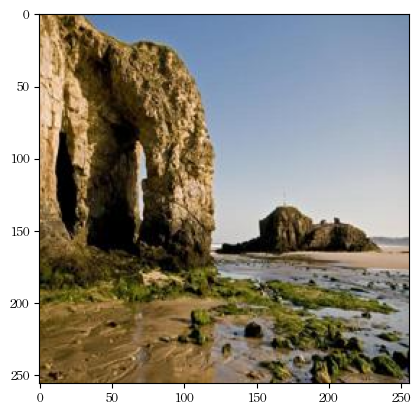

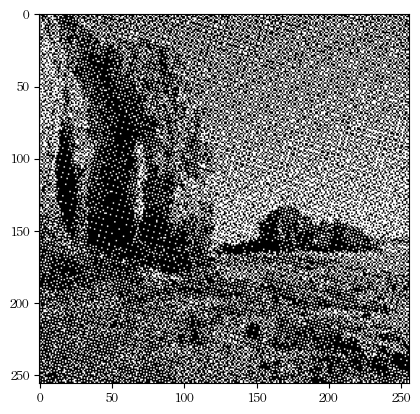

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



img=Image.open('./data/Places365_val_00000005.jpg')
imgg=generate_halftone_gray(img,1)
plt.imshow(img)
plt.show()
plt.imshow(imgg,cmap='gray')
